# My First Notebook

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.integrate import odeint

from IPython.display import display, Math

%config InlineBackend.figure_format = 'retina'

style.use("default")

We will try out the Lotka Volterra Predator Prey model

$$
                \frac{dx}{dt} = ax - bxy
$$
$$
                \frac{dy}{dt} = cxy - dy
$$

In [2]:
def model(SV, t, obj):
    [x, m] = SV
    
    tau = obj.tau
    zeta = obj.zeta
    kp = obj.kp
    p = obj.p
    
    dxbydt = m
    dmbydt = (kp*p - x - 2*tau*zeta*m)/(tau**2)
    
    return [dxbydt, dmbydt]
    

In [3]:
class second_order_system:
    def __init__(self):
        self.tau = 1.0
        self.zeta = 0.1
        self.kp = 2.0
        self.p = 1.0
    
        self.x0 = 0
        self.y0 = 0
        
        self.tmax = 40
        self.nsteps = 10000
    
    def solve(self):
        
        SV0 = [self.x0, self.y0]
        time = np.linspace(0, self.tmax, self.nsteps)
        solution = odeint(
                            model,
                            SV0,
                            time,
                            args = (self,)
        )
        self.solution = solution
        self.xsolution = solution[:,0]
        self.ysolution = solution[:,1]
        self.time = time

In [4]:
sos1 = second_order_system()
sos1.zeta = 0.1
sos1.solve()

sos2 = second_order_system()
sos2.zeta = 1
sos2.solve()

sos3 = second_order_system()
sos3.zeta = 3
sos3.solve()

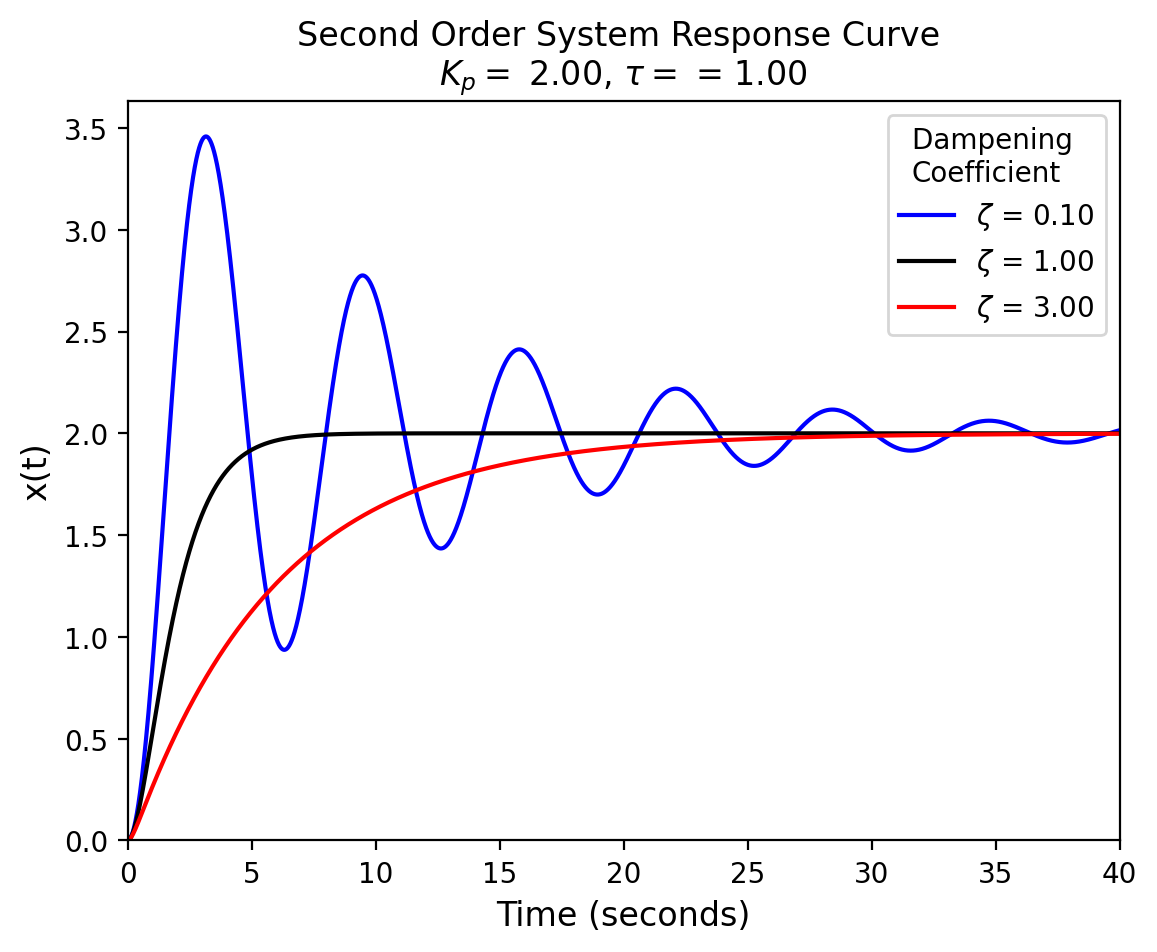

In [7]:
plt.plot(sos1.time, sos1.xsolution, 'b', label = r'$\zeta$ = %.2f' %(sos1.zeta))
plt.plot(sos2.time, sos2.xsolution, 'k', label = r'$\zeta$ = %.2f' %(sos2.zeta))
plt.plot(sos3.time, sos3.xsolution, 'r', label = r'$\zeta$ = %.2f' %(sos3.zeta))
plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("x(t)", fontsize=12)
plt.legend(loc='best',title='Dampening \nCoefficient')
plt.xlim([0, sos1.tmax])
plt.ylim(bottom=0)
plt.title( 
           "Second Order System Response Curve \n" + 
            r"$K_p =$ %.2f, $\tau = $ = %.2f" %(sos1.kp, sos1.tau)
          );
#plt.savefig("2nd_order_response.pdf")
#plt.savefig("2nd_order_response.png", dpi=4000)

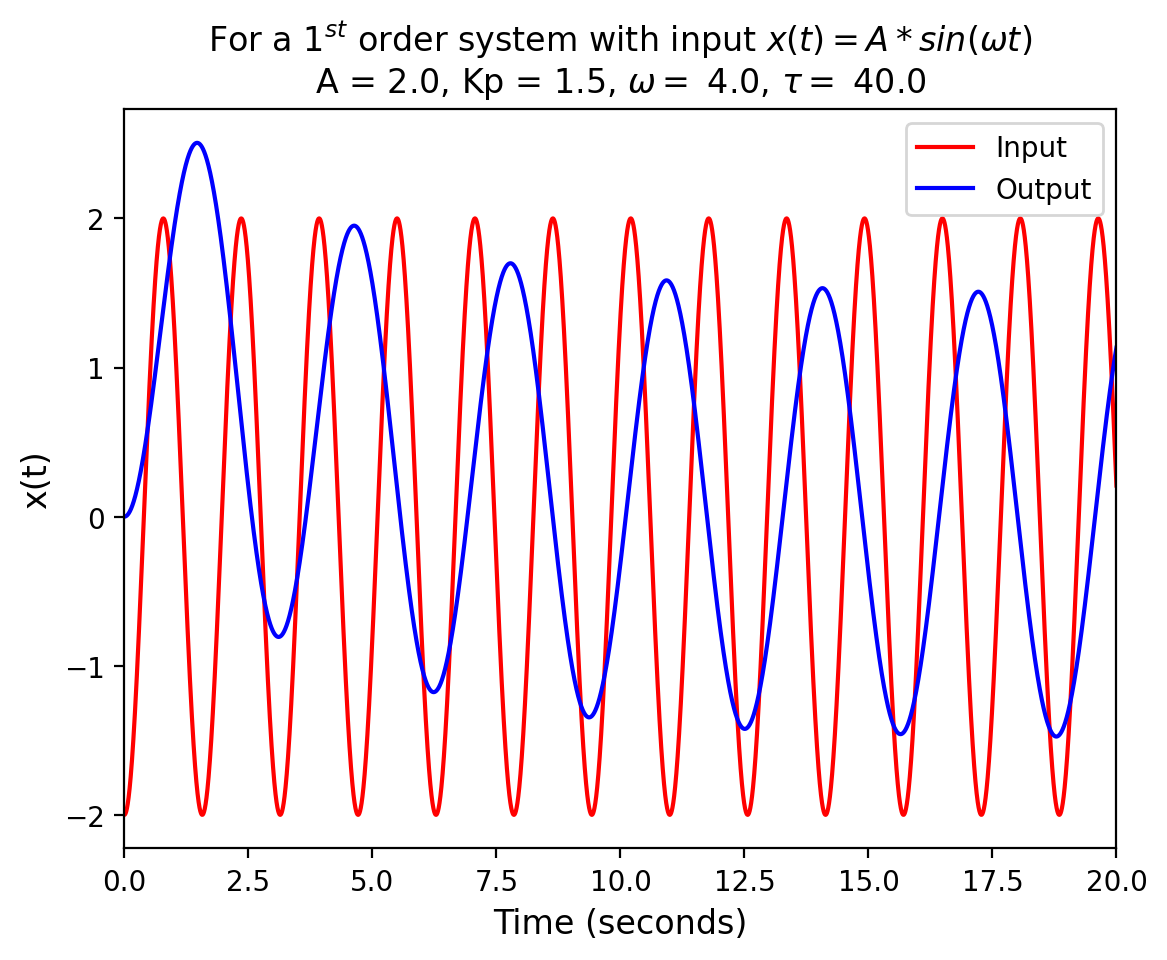

In [4]:

tau   = 40.0 
omega = 4.0
A     = 2.0
Kp    = 1.5
phi = np.arctan(-omega*tau)
def sine_input(x):
    tau   = 4.0 
    omega = 2.0
    A     = 2.0
    Kp    = 6.0
    phi = np.arctan(-omega*tau)
    a11 = omega*tau*np.exp(-x/tau)/(1+ (tau**2)*(omega**2))
    a12 = (1/np.sqrt(1+ (tau**2)*(omega**2)))* np.sin(omega*x+phi)
    y = A*Kp*(a11+a12)
    return y

t = np.linspace(0,20,10000);
y = sine_input(t);
x = A*np.sin(t*omega + phi);

plt.plot(t,x,'r', label ='Input')
plt.plot(t,y,'b', label ='Output')

plt.xlabel("Time (seconds)", fontsize=12)
plt.ylabel("x(t)", fontsize=12)
plt.legend(loc='best')
plt.xlim([0, 20])
#plt.ylim(bottom=0)
plt.title( 
           r"For a $1^{st}$ order system with input "+
           r"$x(t) = A*sin(\omega t)$"+ "\n"+
           r"A = %.1f, Kp = %.1f, $\omega =$ %.1f, $\tau =$ %.1f" %(A,Kp,omega,tau)
          );
plt.savefig("sinusoidal.pdf")
#plt.savefig("2nd_order_response.png", dpi=4000)